## TensorFlow - Gradient Tape
**TensorFlow** has a mechanism to record gradients of variables, that mechanism is called **Gradient Tape**. In this notebook we will make some examples of Gradient Tape.

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#we will optimize (x-1)^2

x = tf.Variable(5.)

#Define the loss function
def get_loss(x):
    return (x-1) ** 2

# Use "gradient tape" to record the gradients
def get_grad(x):
    with tf.GradientTape() as tape:
        L = get_loss(x)

    # Get the gradient
    g = tape.gradient(L, x)
    return g
  

# Define an optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)

# Store the losses
losses = []

# Perform gradient descent
for i in range(50):
    g = get_grad(x)
    optimizer.apply_gradients(zip([g], [x]))
    losses.append(get_loss(x))

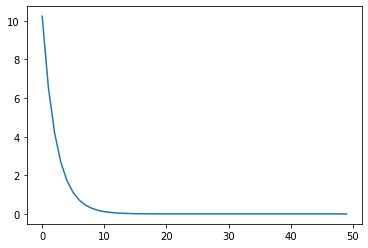

In [3]:
plt.plot(losses)